# Loan credit risk classification case study

This case study is based on a dataset in Machine Learning. The German Credit Risk dataset. The goal is to predict if this loan credit would be a risk to the bank or not?

## Reading the data into python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Pulakesh\Python By Farukh\IVY Python ML Mar-2023\Python Datasets\Classification Datasets\CreditRiskData.csv")

In [4]:
df.head(5)

,GoodCredit,checkingstatus1,duration2,history3,purpose4,amount5,savings6,employ7,installment8,status9,...,residence11,property12,age13,otherplans14,housing15,cards16,job17,liable18,tele19,foreign20
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


* Here our Target variable is GoodCredit and rest of all are my Predictors

## Basic Data Exploration

In [5]:
df.describe() # This provides the descriptive statistical details of the data

,GoodCredit,duration2,amount5,installment8,residence11,age13,cards16,liable18
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
df.shape 

(1000, 21)

In [7]:
# Removing duplicate rows
df=df.drop_duplicates()

In [8]:
#Shape After deleting duplicate values
df.shape

(1000, 21)

In [9]:
# This helps us to identify if a column is categorical or continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique() 

GoodCredit           2
checkingstatus1      4
duration2           33
history3             5
purpose4            10
amount5            921
savings6             5
employ7              5
installment8         4
status9              4
others10             3
residence11          4
property12           4
age13               53
otherplans14         3
housing15            3
cards16              4
job17                4
liable18             2
tele19               2
foreign20            2
dtype: int64

* <b>GoodCredit </b> - categorical
* <b>checkingstatus1 </b> - categorical
* <b>duration2 </b> - continuous
* <b>history3 </b> - categorical
* <b>purpose4 </b> - categorical
* <b>amount5 </b> - continuous
* <b>savings6 </b> - categorical
* <b>employ7 </b> - categorical
* <b>installment8 </b> - categorical
* <b>status9 </b> - categorical
* <b>others10 </b> - categorical
* <b>residence11 </b> - categorical
* <b>property12 </b> - categorical
* <b>age13 </b> - continuous
* <b>otherplans14 </b> - categorical
* <b>housing15 </b> - categorical
* <b>cards16 </b> - categorical
* <b>job17 </b> - categorical
* <b>liable18 </b> - categorical 
* <b>tele19               2 </b> - categorical
* <b>foreign20          </b> - categorical

## Looking at the distribution of Target variable

<AxesSubplot:xlabel='GoodCredit', ylabel='count'>

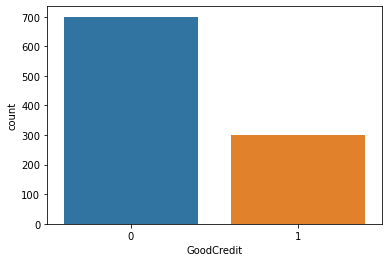

In [10]:
sns.countplot(data=df,x='GoodCredit')

## Visual Exploratory Data Analysis

* Categorical variables: Bar plot
* Continuous variables: Histogram

In [15]:
categorical_col=['checkingstatus1', 'history3', 'purpose4',
       'savings6', 'employ7', 'installment8', 'status9', 'others10',
       'residence11', 'property12','otherplans14', 'housing15',
       'cards16', 'job17', 'liable18', 'tele19', 'foreign20']
continuous_col=['duration2', 'age13', 'amount5' ]

### Visualize distribution of all the Categorical Predictor variables in the data using bar Plots

In [18]:
# define function to plot barplot

def barplotfunction(inpData,cols):
    fig,sub= plt.subplots(nrows=6,ncols=3,figsize=(20,40))
    sub=sub.flatten()
    
    for i , col in enumerate(cols):
        sns.countplot(data=inpData,x=col,ax=sub[i])

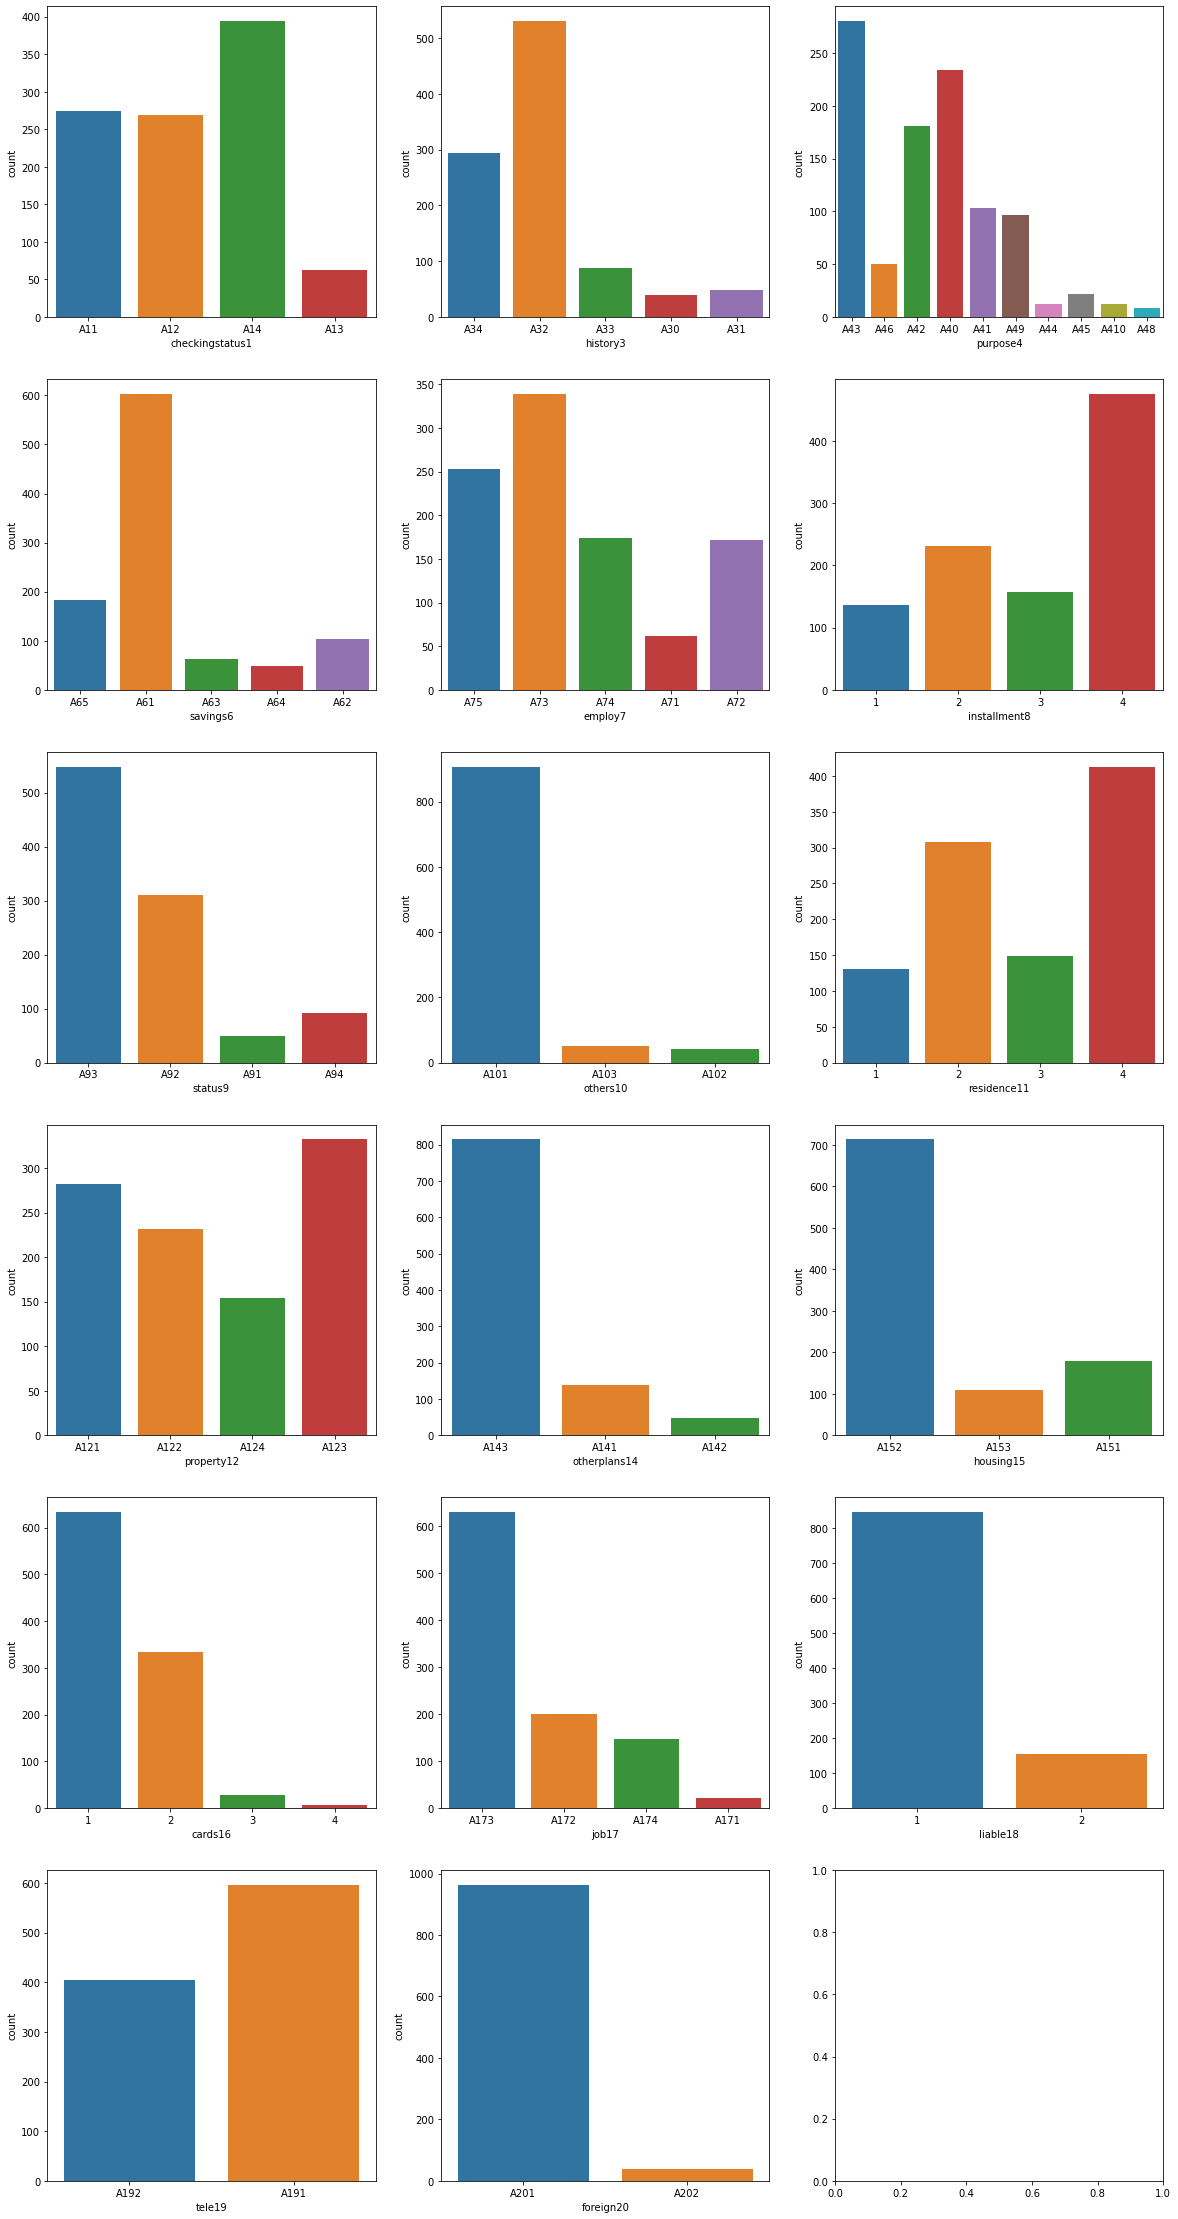

In [19]:
barplotfunction(df,categorical_col)

 All the categorical variables are selected with a doubt on foreign20,liable18,others10.

### Visualize distribution of all the Continuous Predictor variables in the data using histograms

In [20]:
def histplotfunction(inpData,cols):
    fig,sub= plt.subplots(nrows=3,ncols=1,figsize=(10,20))
    sub=sub.flatten()
    
    for i , col in enumerate(cols):
        sns.histplot(data=inpData,x=col,ax=sub[i])

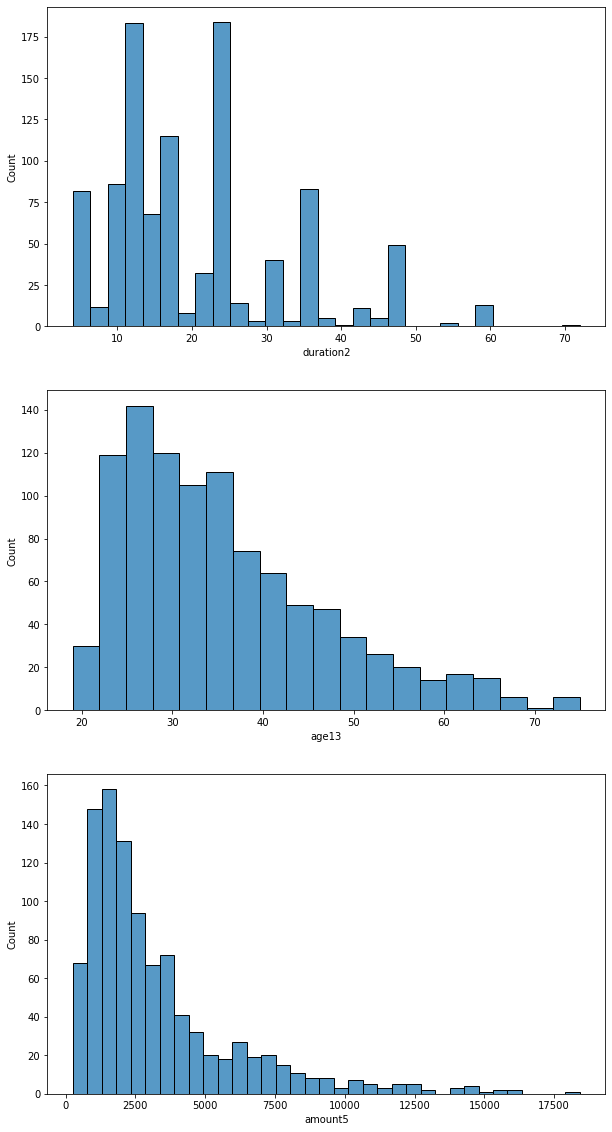

In [21]:
histplotfunction(df,continuous_col)

## Missing values treatment


In [22]:
df.isnull().sum()

GoodCredit         0
checkingstatus1    0
duration2          0
history3           0
purpose4           0
amount5            0
savings6           0
employ7            0
installment8       0
status9            0
others10           0
residence11        0
property12         0
age13              0
otherplans14       0
housing15          0
cards16            0
job17              0
liable18           0
tele19             0
foreign20          0
dtype: int64

## Feature Selection 

To finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In [23]:
# define function to plot barplot

def groupbarplotfunction(inpData,cols):
    fig,sub= plt.subplots(nrows=6,ncols=3,figsize=(20,40))
    sub=sub.flatten()
    
    for i , col in enumerate(cols):
        sns.countplot(data=inpData,x=col,hue='GoodCredit',ax=sub[i])

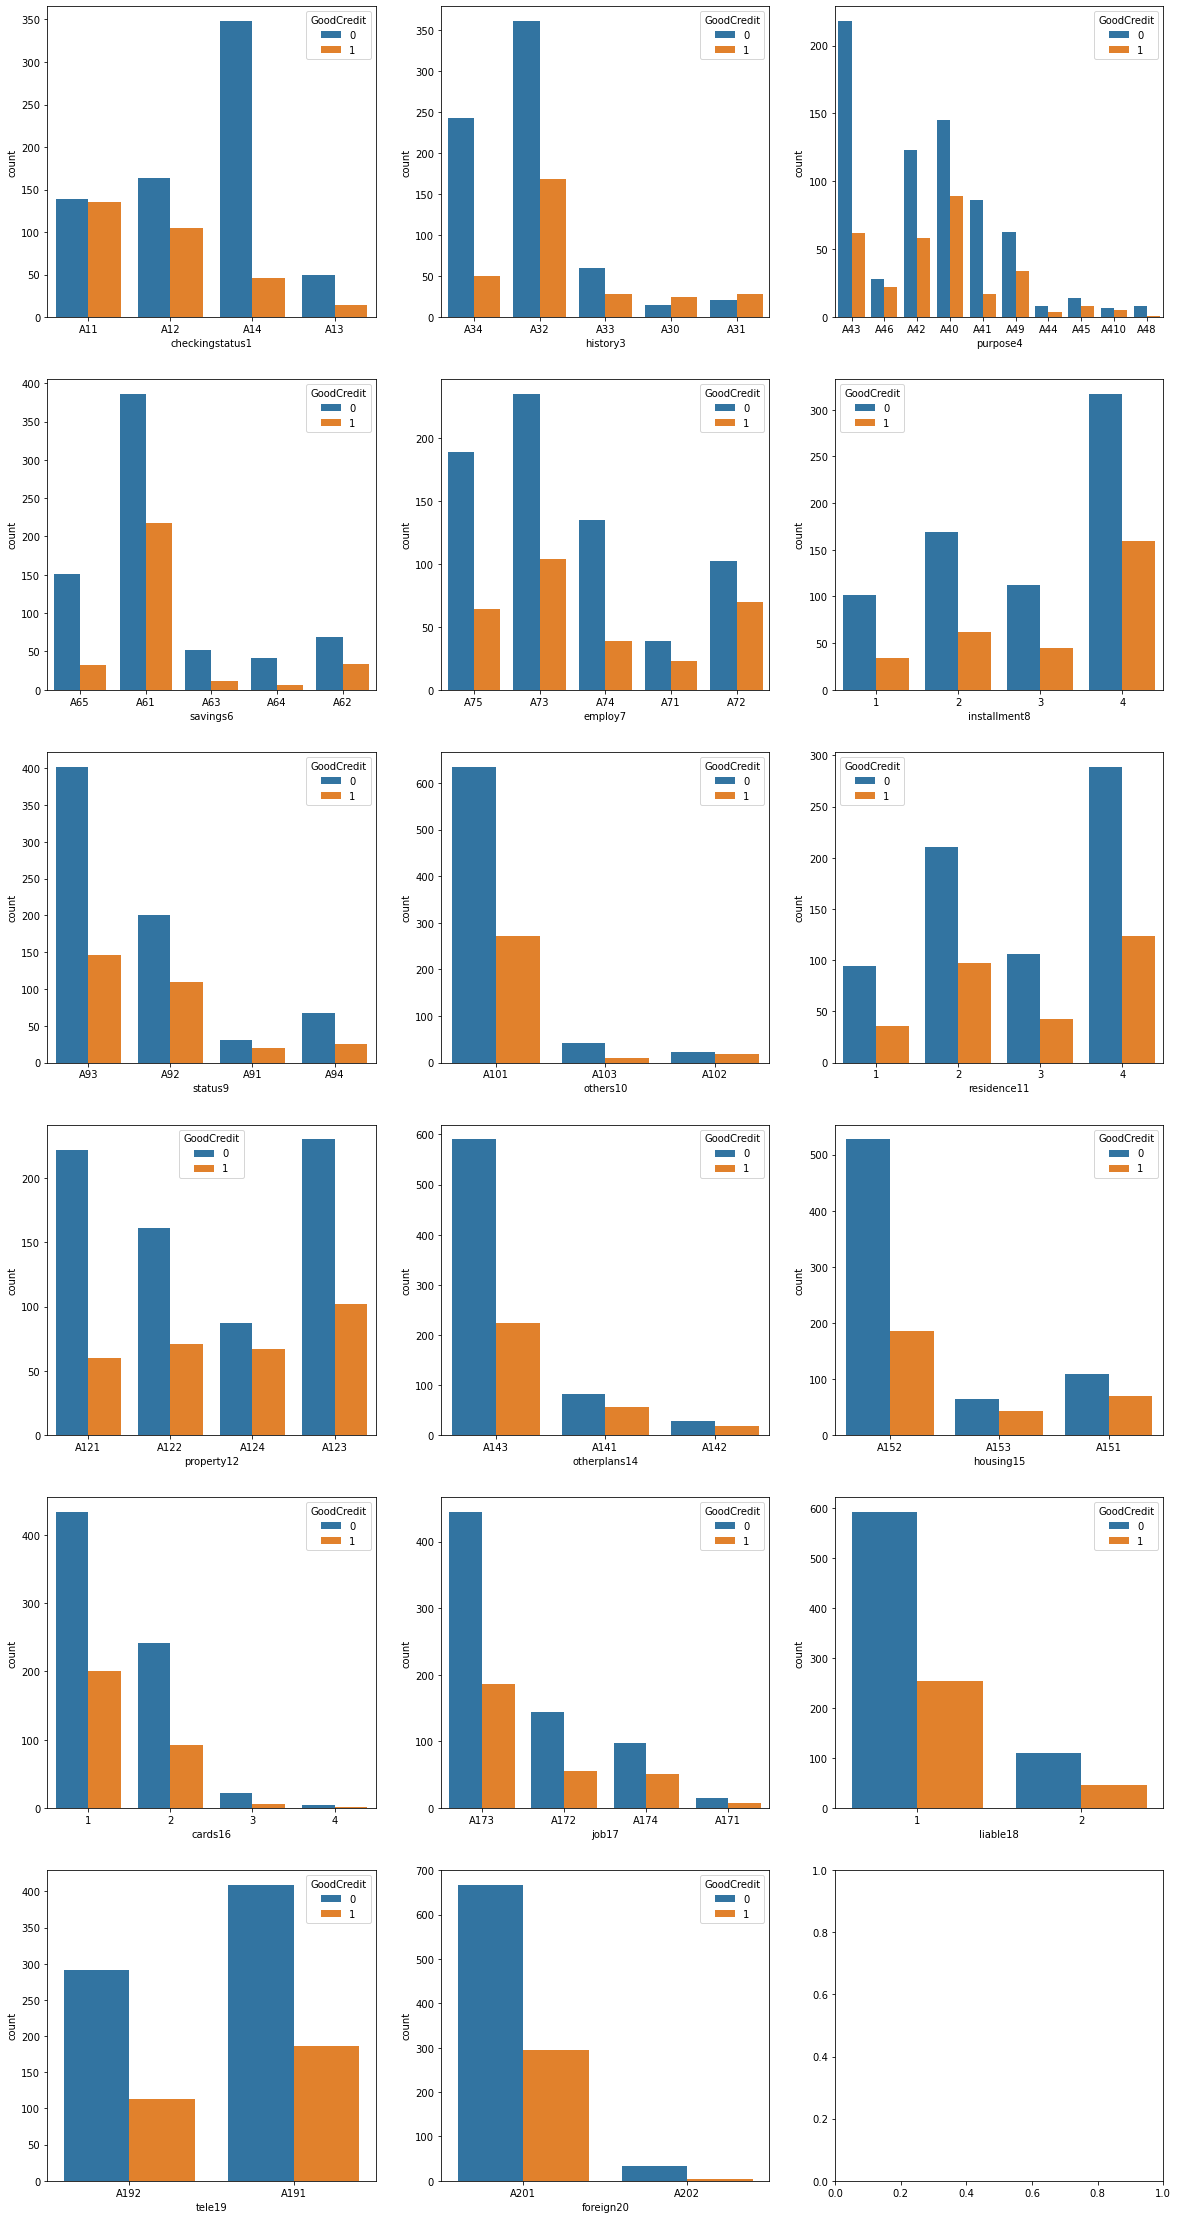

In [24]:
groupbarplotfunction(df,categorical_col)

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [25]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [26]:
FunctionChisq(df,'GoodCredit',categorical_col)

checkingstatus1 is correlated with GoodCredit | P-Value: 1.2189020722893755e-26
history3 is correlated with GoodCredit | P-Value: 1.2791872956751013e-12
purpose4 is correlated with GoodCredit | P-Value: 0.00011574910079691586
savings6 is correlated with GoodCredit | P-Value: 2.7612142385682596e-07
employ7 is correlated with GoodCredit | P-Value: 0.001045452349140254
installment8 is NOT correlated with GoodCredit | P-Value: 0.1400333122128481
status9 is correlated with GoodCredit | P-Value: 0.02223800546926877
others10 is correlated with GoodCredit | P-Value: 0.036055954027247226
residence11 is NOT correlated with GoodCredit | P-Value: 0.8615521320413175
property12 is correlated with GoodCredit | P-Value: 2.8584415733250017e-05
otherplans14 is correlated with GoodCredit | P-Value: 0.0016293178186473534
housing15 is correlated with GoodCredit | P-Value: 0.00011167465374597684
cards16 is NOT correlated with GoodCredit | P-Value: 0.4451440800083001
job17 is NOT correlated with GoodCredit |

['checkingstatus1',
 'history3',
 'purpose4',
 'savings6',
 'employ7',
 'status9',
 'others10',
 'property12',
 'otherplans14',
 'housing15',
 'foreign20']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','property12','otherplans14','housing15','foreign20'

In [27]:
selected_cat_col= ['checkingstatus1','history3','purpose4','savings6','employ7','status9','others10','property12','otherplans14','housing15','foreign20']

### Visual Relationship exploration: Categorical Vs Continuous -- Box Plots

In [40]:
def boxplotfunction(inpData,cols):
    fig,sub= plt.subplots(nrows=3,ncols=1,figsize=(10,20))
    sub=sub.flatten()
    
    for i , col in enumerate(cols):
        sns.boxplot(data=inpData,y=col,x='GoodCredit',ax=sub[i])

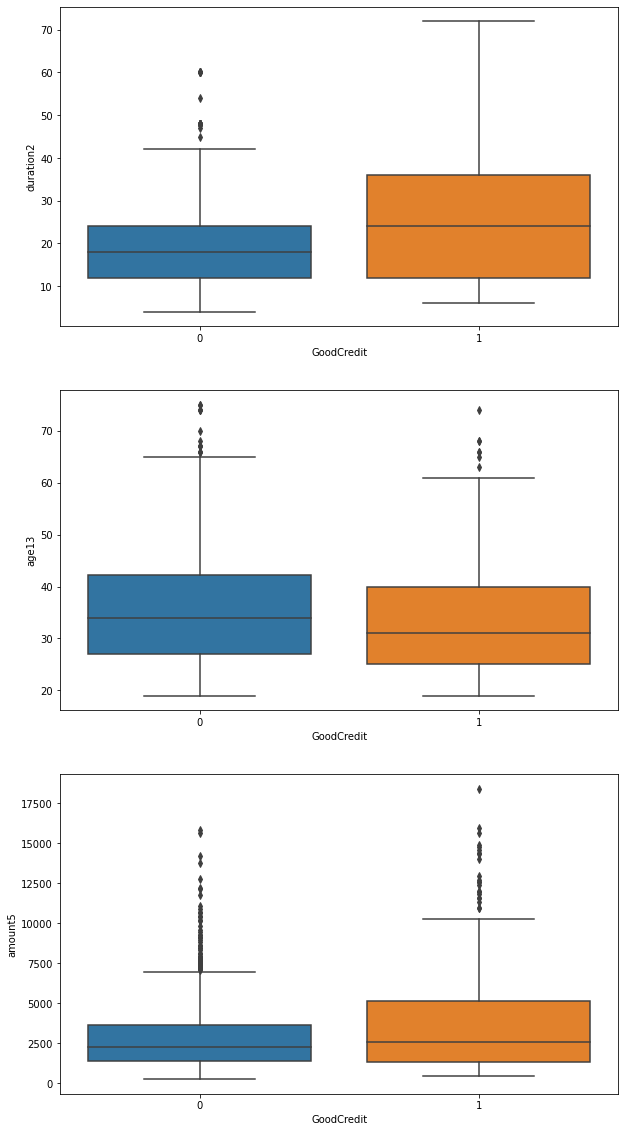

In [41]:
boxplotfunction(df,continuous_col)

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [28]:
# Defining a function to find the statistical relationship with all the continious variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [29]:
FunctionAnova(df,'GoodCredit',continuous_col)

##### ANOVA Results ##### 

duration2 is correlated with GoodCredit | P-Value: 6.488049877187189e-12
age13 is correlated with GoodCredit | P-Value: 0.003925339398278295
amount5 is correlated with GoodCredit | P-Value: 8.797572373533373e-07


['duration2', 'age13', 'amount5']

All three columns are correlated with GoodCredit.

### Selecting final predictors for Machine Learning

In [30]:
cr_ml= pd.concat([df[continuous_col],df[selected_cat_col]],axis=1)

### Data Pre-processing for Machine Learning

In [33]:
#Converting the binary nominal variable to numeric using 1/0 mapping
# replace the nominal data with numeric data
cr_ml['foreign20'].replace({'A201':0, 'A202':1}, inplace=True)

# replace ordinal  values from the data
cr_ml['savings6'].replace({'A61':0,'A62':1,'A63':2,'A64':3,'A65':4},inplace=True)

cr_ml['employ7'].replace({'A71':0,'A72':1,'A73':2,'A74':3,'A75':4},inplace=True)


In [39]:
#Converting nominal variables to numeric using get_dummies()
cr_ml_numeric=pd.get_dummies(cr_ml)

# Adding Target Variable to the data
cr_ml_numeric['GoodCredit']=df['GoodCredit']
cr_ml_numeric

,duration2,age13,amount5,savings6,employ7,foreign20,checkingstatus1_A11,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property12_A122,property12_A123,property12_A124,otherplans14_A141,otherplans14_A142,otherplans14_A143,housing15_A151,housing15_A152,housing15_A153,GoodCredit
0,6,67,1169,4,4,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,48,22,5951,0,2,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,12,49,2096,0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,42,45,7882,0,3,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,24,53,4870,0,2,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,31,1736,0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
996,30,40,3857,0,2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
997,12,38,804,0,4,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
998,45,23,1845,0,2,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [40]:
# Saving this final data for reference during deployment
cr_ml_numeric.to_pickle('cr_ml_numeric.pkl')

In [41]:
cr_ml_numeric.columns

Index(['duration2', 'age13', 'amount5', 'savings6', 'employ7', 'foreign20',
       'checkingstatus1_A11', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history3_A30', 'history3_A31', 'history3_A32',
       'history3_A33', 'history3_A34', 'purpose4_A40', 'purpose4_A41',
       'purpose4_A410', 'purpose4_A42', 'purpose4_A43', 'purpose4_A44',
       'purpose4_A45', 'purpose4_A46', 'purpose4_A48', 'purpose4_A49',
       'status9_A91', 'status9_A92', 'status9_A93', 'status9_A94',
       'others10_A101', 'others10_A102', 'others10_A103', 'property12_A121',
       'property12_A122', 'property12_A123', 'property12_A124',
       'otherplans14_A141', 'otherplans14_A142', 'otherplans14_A143',
       'housing15_A151', 'housing15_A152', 'housing15_A153', 'GoodCredit'],
      dtype='object')

In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['duration2', 'age13', 'amount5', 'savings6', 'employ7', 'foreign20',
       'checkingstatus1_A11', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history3_A30', 'history3_A31', 'history3_A32',
       'history3_A33', 'history3_A34', 'purpose4_A40', 'purpose4_A41',
       'purpose4_A410', 'purpose4_A42', 'purpose4_A43', 'purpose4_A44',
       'purpose4_A45', 'purpose4_A46', 'purpose4_A48', 'purpose4_A49',
       'status9_A91', 'status9_A92', 'status9_A93', 'status9_A94',
       'others10_A101', 'others10_A102', 'others10_A103', 'property12_A121',
       'property12_A122', 'property12_A123', 'property12_A124',
       'otherplans14_A141', 'otherplans14_A142', 'otherplans14_A143',
       'housing15_A151', 'housing15_A152', 'housing15_A153']
X=cr_ml_numeric[Predictors].values
y=cr_ml_numeric[TargetVariable].values

In [43]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Normalization of data

In [44]:
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X_train)
X_train=PredictorScalerFit.transform(X_train)
X_test=PredictorScalerFit.transform(X_test)


In [45]:
X_train.shape

(800, 42)

In [46]:
y_train.shape

(800,)

# Logistic Regression

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       141
           1       0.71      0.54      0.62        59

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200

[[128  13]
 [ 27  32]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.76902287 0.68       0.72238245 0.73104474 0.76028751 0.81371158
 0.65257937 0.78407524 0.78113208 0.77519841]

Final Average Accuracy of the model: 0.75


# Decision Trees

In [48]:
# DEcision Tree
from sklearn import tree

model=tree.DecisionTreeClassifier( criterion='gini', max_depth=6)
print(model)

DecisionTreeClassifier(max_depth=6)


In [49]:
# Creating the model on Training Data

DT=model.fit(X_train,y_train)

# Measuring accuracy on Testing Data
prediction=DT.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))


# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DT, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[[124  17]
 [ 31  28]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       141
           1       0.62      0.47      0.54        59

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.75      0.76      0.75       200

Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.67690925 0.66403326 0.70857074 0.72702703 0.68509385 0.69011858
 0.70857074 0.74604343 0.73944295 0.73438735]

Final Average Accuracy of the model: 0.71


<AxesSubplot:>

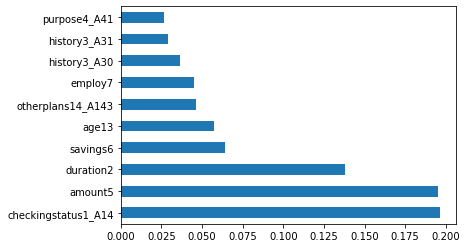

In [51]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline

feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=8)

# Creating the model on Training Data
RF=model.fit(X_train,y_train)

# Measuring accuracy on Testing Data
prediction=RF.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RF,X,y,scoring='f1_weighted',cv=10)

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[[134   7]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       141
           1       0.75      0.36      0.48        59

    accuracy                           0.78       200
   macro avg       0.76      0.65      0.67       200
weighted avg       0.77      0.78      0.75       200

Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.7917953  0.6835711  0.69011858 0.7427957  0.74538879 0.69899666
 0.66013192 0.76987902 0.67569892 0.75256116]

Final Average Accuracy of the model: 0.72


# AdaBoost

In [67]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier( criterion='gini', max_depth=5)
model=AdaBoostClassifier(n_estimators=150,learning_rate=1.0,base_estimator=DT)
ADB=model.fit(X_train,y_train)
prediction=ADB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       141
           1       0.71      0.58      0.64        59

    accuracy                           0.81       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200

[[127  14]
 [ 25  34]]
Accuracy of the model on Testing Sample Data: 0.8


In [68]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RF,X,y,scoring='f1_weighted',cv=10)

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.77407758 0.69125    0.65333333 0.72266667 0.72867133 0.69899666
 0.63822844 0.77865613 0.69124574 0.75256116]

Final Average Accuracy of the model: 0.71


# XGBoost

In [69]:
# XG boost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

DT= DecisionTreeClassifier( criterion='gini', max_depth=6)
model=XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=150, objective='binary:logistic', booster='gbtree')
XGB=model.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       141
           1       0.74      0.54      0.63        59

    accuracy                           0.81       200
   macro avg       0.79      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200

[[130  11]
 [ 27  32]]
Accuracy of the model on Testing Sample Data: 0.8


In [70]:
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RF,X,y,scoring='f1_weighted',cv=10)

print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.80460526 0.63669274 0.75256116 0.72043011 0.70701028 0.69899666
 0.62965642 0.83862684 0.68344988 0.77865613]

Final Average Accuracy of the model: 0.73
